### Course: Bayesian Filtering and Smoothing.
### Exercise round: 6
### Student's name: Diego Alejandro Agudelo España.

### Exercise 1. (Optimal Importance Distribution)


Recall the following state space model from Exercise 3 on Round 1:

\begin{align}
	\mathbf{x}_k &= \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \mathbf{x}_{k-1} + \mathbf{w}_{k-1} \\
	y_k   &= \begin{bmatrix} 1 & 0 \end{bmatrix} \mathbf{x}_{k-1} + v_{k}	
\end{align}


where $\mathbf{x}_k = \begin{bmatrix}x_k & \dot{x}_k \end{bmatrix}^\top$ is the state, $y_k$ is the measurement, and $\mathbf{w}_k \sim \mathcal{N}(\mathbf{0}, \operatorname{diag}(1/10^2,1^2))$ and $v_k \sim \mathcal{N}(0,10^2)$ are white Gaussian noise processes.


1. Write down the Kalman filter equations for this model.
2. Derive expression for the optimal importance distribution for the model:

	\begin{align}
		\pi(\mathbf{x}_k) = p(\mathbf{x}_k|\mathbf{x}_{k-1},\mathbf{y}_{1:k}).
	\end{align}
    
3. Write pseudo code for the corresponding particle filter algorithm (sequential importance resampling algorithm). Also write down the equations for the weight update.
4. Compare the number of CPU steps (multiplications and additions) needed by the particle filter and Kalman filter. Which implementation would you choose for a real implementation?

### Solution Exercise 1.

### 1.

Rewriting the given state space model as:

\begin{align}
	\mathcal{x}_k &= \mathbf{A} \mathcal{x}_{k-1} + \mathcal{w}_{k-1} \qquad & \mathcal{w}_{k-1} \sim \mathcal{N}(0,\mathbf{Q}) \\
	y_k   &= \mathbf{H} \mathcal{x}_{k-1} + v_{k} \qquad & v_{k}  \sim \mathcal{N}(0, R)
\end{align}

where

$$
\mathbf{A} =  \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \qquad \mathbf{H} =  \begin{bmatrix} 1 & 0 \end{bmatrix} \qquad \mathbf{Q} = \operatorname{diag}(1/10^2,1^2) \qquad R = 10^2
$$



The Kalman Filter equations for the aforementioned model are the following:





* Initialization:

$$
\mathbf{x}_0  \sim \mathcal{N}(\mathbf{m}_0, \mathbf{P}_0)
$$

* Prediction Step:

$$
\begin{align}
    \mathbf{m}_k^{-} & = \mathbf{A} \mathbf{m}_{k-1}\\
    \mathbf{P}_k^{-} & = \mathbf{A} \mathbf{P}_{k-1} \mathbf{A}^\top + \mathbf{Q}
\end{align}
$$


* Update Step

$$
\begin{align}
    \mathbf{S}_k & = \mathbf{H} \mathbf{P}_{k}^{-} \mathbf{H}^\top + \mathbf{R} \\
    \mathbf{K}_k & = \mathbf{P}_{k}^{-} \mathbf{H}^\top \mathbf{S}_k^{-1}\\
    \mathbf{m}_k & = \mathbf{m}_k^{-} + \mathbf{K}_k (\mathbf{y}_k - \mathbf{H} \mathbf{m}_k^{-} ) \\
    \mathbf{P}_k & = \mathbf{P}_k^{-} - \mathbf{K}_{k} \mathbf{S}_k \mathbf{K}_{k}^\top
\end{align}
$$

### 2.

Deriving the optimal importance distribution for the given state space model

$$
\begin{align}
		\pi(\mathbf{x}_k) = p(\mathbf{x}_k|\mathbf{x}_{k-1},\mathbf{y}_{1:k}).
\end{align}
$$

Given the markovian property over the dynamics we have

$$
p(\mathbf{x}_k|\mathbf{x}_{k-1},\mathbf{y}_{1:k}) = p(\mathbf{x}_k|\mathbf{x}_{k-1},{y}_{k})
$$

Now using Bayes theorem we can rewrite this expression as:

$$
\begin{align}
p(\mathbf{x}_k|\mathbf{x}_{k-1},y_{k}) & = \frac{p(y_k | \mathbf{x}_k, \mathbf{x}_{k-1}) p(\mathbf{x}_k | \mathbf{x}_{k-1})}{ p(y_k | \mathbf{x}_{k-1})  } \\
                                                   & = \frac{p(y_k | \mathbf{x}_k) p(\mathbf{x}_k | \mathbf{x}_{k-1})}{ p(y_k | \mathbf{x}_{k-1})  }
\end{align}
$$

Recall that the probabilities $p(y_k | \mathbf{x}_k)$ and $ p(\mathbf{x}_k | \mathbf{x}_{k-1})$ are Gaussian distributed, namely:


$$
p(y_k | \mathbf{x}_k) \sim \mathcal{N}(\mathbf{H} \mathbf{x}_{k}, R) \qquad p(\mathbf{x}_k | \mathbf{x}_{k-1})  \sim \mathcal{N}(\mathbf{A} \mathbf{x}_{k-1}, \mathbf{Q})
$$

Therefore Gaussian properties can be applied and the joint distribution of random variables $\mathbf{x}_k$ and $y_k$ given $\mathbf{x}_{k-1}$ can be expressed as:

$$
\begin{pmatrix}
\mathbf{x}_k \\
\mathbf{y}_k \\
\end{pmatrix}
\sim
\mathcal{N}
\bigg(
\begin{pmatrix}
\mathbf{A} \mathbf{x}_{k-1} \\
\mathbf{H} \mathbf{A} \mathbf{x}_{k-1}  \\
\end{pmatrix}
,
\begin{pmatrix}
\mathbf{Q} &   \mathbf{Q} \mathbf{H}^\top \\
  \mathbf{H} \mathbf{Q}  & \mathbf{R} + \mathbf{H} \mathbf{Q} \mathbf{H}^\top \\
\end{pmatrix}
\bigg)
$$

Now conditioning on $y_k$ we get:

$$
p(\mathbf{x}_k|\mathbf{x}_{k-1},{y}_{k}) = \mathcal{N}(\mathbf{m}_{\pi}, \mathbf{P}_{\pi})
$$

where

$$
\mathbf{m}_{\pi} = \mathbf{A} \mathbf{x}_{k-1} + \mathbf{Q} \mathbf{H}^\top  (\mathbf{R} + \mathbf{H} \mathbf{Q} \mathbf{H}^\top)^{-1} (y_k - \mathbf{H} \mathbf{A} \mathbf{x}_{k-1})
$$

$$
\mathbf{P}_{\pi} = \mathbf{Q} - \mathbf{Q} \mathbf{H}^\top  (\mathbf{R} + \mathbf{H} \mathbf{Q} \mathbf{H}^\top)^{-1} \mathbf{H} \mathbf{Q}
$$

### 3.

In order to implement the sequential importance resampling algorithm (SIR) the weights update need to be derived. Recall that general weight update for SIR takes the following form:

$$
W_k^i \propto W_{k-1}^i \frac{p(y_k^i | \mathbf{x}_k^i) p(\mathbf{x}_k^i | \mathbf{x}_{k-1}^i)}{\pi(\mathbf{x}_k^i | \mathbf{x}_{0:k-1}^i,  \mathbf{y}_{1:k}^i)}
$$

Taking into account the particular form of the optimal important distribution we assumed in this exercise, an equivalent weight update will be:

$$
\begin{align}
W_k^i & \propto W_{k-1}^i \frac{p(y_k^i | \mathbf{x}_k^i) p(\mathbf{x}_k^i | \mathbf{x}_{k-1}^i)}{ \bigg( \frac{p(y_k^i | \mathbf{x}_k^i) p(\mathbf{x}_k^i | \mathbf{x}_{k-1}^i)}{ p(y_k | \mathbf{x}_{k-1}^i)  } \bigg)} \\
\\
      & \propto W_{k-1}^i  p(y_k | \mathbf{x}_{k-1}^i) 
\end{align}
$$



Using the joint distribution derived for $\mathbf{x}_k$ and $y_k$ given $\mathbf{x}_{k-1}$ we can easily get the marginal distribution $p(y_k | \mathbf{x}_{k-1}^i)$ which is:

$$
p(y_k | \mathbf{x}_{k-1}^i) = \mathcal{N}( y_k | \mathbf{H} \mathbf{A} \mathbf{x}_{k-1}^i,  \mathbf{H} \mathbf{Q} \mathbf{H}^\top + \mathbf{R})
$$

Now we have all we need to describe a SIR algorithm for this particular model.

* Let $T$ be the length of the measurements sequence.
* Let $N$ be the number of particles used.
* for $k$ in $1,2, \dots, T$:
    * for $i$ in $1,2, \dots,N$:
        * Draw $\mathbf{x}_k^i$ from important distribution $p(\mathbf{x}_k^i|\mathbf{x}_{k-1}^i,{y}_{k}) = \mathcal{N}(\mathbf{m}_{\pi}, \mathbf{P}_{\pi})$
        * Calculate the new weight using $W_{k}^i \propto W_{k-1}^i  \mathcal{N}( y_k | \mathbf{H} \mathbf{A} \mathbf{x}_{k-1}^i,  \mathbf{H} \mathbf{Q} \mathbf{H}^\top + \mathbf{R})$ 
    * Normalize the weights $W_{k}^i$ to sum to unity.
    * if the number of effective particles is too low:
        * do resampling


### 4.

Since most of the computational operations are given in terms of matrix multiplications we have to estimate the number of CPU steps this operation takes. Let's assume that the number of steps (i.e additions and multiplications) needed to multiply a matrix $\mathbf{A}$ of size $a \times b$ by a matrix $\mathbf{B}$ of size $b \times c$ is about $2 a b c$. Let's also assume that the cost of summing of two matrices $\mathbf{A}$ and $\mathbf{B}$ of length $a \times b$ is $ab$.

Let's start by giving an estimation of the number of CPU steps needed to peform a Kalman filter iteration.

* Prediction step:

$$
\begin{align}
    \mathbf{m}_k^{-} & = \mathbf{A} \mathbf{m}_{k-1} \qquad \text{steps} = 2(2\times2\times1) = 8\\
    \mathbf{P}_k^{-} & = \mathbf{A} \mathbf{P}_{k-1} \mathbf{A}^\top + \mathbf{Q} \qquad \text{steps} = 2(2\times2\times2) + 2(2\times2\times2) + 2 \times 2 = 36
\end{align}
$$

* Update step.

$$
\begin{align}
    \mathbf{S}_k & = \mathbf{H} \mathbf{P}_{k}^{-} \mathbf{H}^\top + \mathbf{R} \qquad \text{steps} = 2(1\times2\times2) + 2(1\times2\times1) + 1 = 13\\
    \mathbf{K}_k & = \mathbf{P}_{k}^{-} \mathbf{H}^\top \mathbf{S}_k^{-1} \qquad \text{steps} = 2(2\times2\times1) + 2 = 10\\
    \mathbf{m}_k & = \mathbf{m}_k^{-} + \mathbf{K}_k (\mathbf{y}_k - \mathbf{H} \mathbf{m}_k^{-} ) \qquad \text{steps} = 2(1\times2\times1) + 5 = 9 \\
    \mathbf{P}_k & = \mathbf{P}_k^{-} - \mathbf{K}_{k} \mathbf{S}_k \mathbf{K}_{k}^\top  \qquad \text{steps} = 2(2\times1\times2) + 6 = 14
\end{align}
$$

The above estimation takes into account that some values are in fact scalar values. This gives an estimation of roughly $90$ CPU steps per Kalman filter iteration. Assuming that we have a measurements sequence of length $T$ the overall estimation will be of $90T$

On the other hand the particle filter is largely dependent on the number of particles $N$ used to represent the posterior distribution. Most of the matrix multiplication operations can be done offline since they don't depend on $\mathbf{x}_k$ or $\mathbf{y}_k$. A rough estimation of the CPU operations needed by the particle filter is $20 N T + C$ where $20$ is the estimation of steps performed for each particle in each iteration and $C$ represents the offline computational work.

Relying on this estimation it becomes clear that the computational load per iteration of the particle filter is greater to its counterpart using a few particles (e.g. more than $5$). Therefore the Kalman Filter is a better choice from the perspective of computational efficiency.

###  Exercise 3. (Bearings Only Tracking with SIR)

Implement a bootstrap filter and SIR with CKF importance distribution to the bearings only target tracking model in Exercises 4.3 and 5.3. Plot the results and compare RMSE values to those of the non-linear Kalman filters.

### Solution Exercise 3.

The following is the implementation of the boostrap filter for the bearings only target tracking model.

In [ ]:
%% Bearings only target tracking demo file
%
% Bayesian Estimation of Time-Varying Processes (5 p) L V
%
% This software is distributed under the GNU General Public 
% Licence (version 2 or later); please refer to the file 
% Licence.txt, included with the software, for details.
%
%% Generate data

  % Lock seed
  randn('state',123);

  % Implement RMSE (true and estimate)
  rmse = @(X,EST) sqrt(mean(sum((X-EST).^2)));
  
  % Create a bit curved trajectory and angle
  % measurements from two sensors
  S1 = [-1.5;0.5]; % Position of sensor 1
  S2 = [1;1];      % Position of sensor 2
  sd = 0.05;       % Standard deviation of measurements
  dt = 0.01;       % Sampling period
  x0 = [0;0;1;0];  % Initial state

  a = zeros(1,500);
  a(1,50:100)  = pi/2/51/dt + 0.01*randn(1,51);
  a(1,200:250) = pi/2/51/dt + 0.01*randn(1,51);
  a(1,350:400) = pi/2/51/dt + 0.01*randn(1,51);
  x = x0;
  t = 0;
  X = [];
  Theta = [];
  T = [];
  for i=1:500
    F = [0 0  1    0;...
         0 0  0    1;...
         0 0  0   a(i);...
         0 0 -a(i) 0];
    x = expm(F*dt)*x;
    y1 = atan2(x(2)-S1(2), x(1)-S1(1)) + sd * randn;
    y2 = atan2(x(2)-S2(2), x(1)-S2(1)) + sd * randn;
    t  = t + dt;
    X = [X x];
    T = [T t];
    Theta = [Theta [y1;y2]];
  end
  steps = size(Theta,2);


%% Dynamic model

  % Parameters of the dynamic model
  qc = 0.1;
  
  % This is the transition matrix
  A  = [1 0 dt 0;
        0 1 0 dt;
        0 0 1 0;
        0 0 0 1];

  % This is the process noise covariance
  Q = [qc*dt^3/3 0 qc*dt^2/2 0;
       0 qc*dt^3/3 0 qc*dt^2/2;
       qc*dt^2/2 0 qc*dt 0;
       0 qc*dt^2/2 0 qc*dt];
 
%% Bootstrap Solution
  


  fprintf('Running Bootstrap solution.\n');

  m2 = x0;            % Initialize to true value
  P2 = eye(4);        % Some uncertainty
  R  = sd^2*eye(2);   % The joint covariance
  EST2 = zeros(4,steps);
 
  N = 10000; % number of particles
  % initial set of particles
  SX = mvnrnd(m2, P2, N)';
  
  % Set up figure
  figure(1); clf
  
  % Loop through steps
  for k=1:steps
    
    % Sampling from the important distribution
    SX = A * SX + mvnrnd(zeros(size(m2, 1), 1), Q, N)';
    
    % Propagating particles through the measurement model
   
    my1 = atan2(SX(2,:) - S1(2), SX(1,:) - S1(1));
    my2 = atan2(SX(2,:) - S2(2), SX(1,:) - S2(1));
    
    % Computing new weights
    means = [my1', my2'];
    size(means)
    W = mvnpdf(Theta(:,k)', means, R)';
    
    % normalizing
    W = W ./ sum(W);
    
    % Resampling step
    idx = resampstr(W);
    SX(:,:) = SX(:, idx);
   
    % computing current mean
    m2 = mean(SX, 2);
    EST2(:, k) = m2;
  end

  % Compute error
  err_bootstrap = rmse(X,EST2)
  
  % Plot bootstrap
  figure(1); clf

    plot(X(1,:),X(2,:),'--',...
         EST2(1,:),EST2(2,:),'-',...
         S1(1),S1(2),'kx',S2(1),S2(2),'ko')
    legend('True trajectory','Bootstrap estimate','Sensor 1','Sensor 2');
    xlabel('x'); ylabel('y'); title('\bf Bootstrap Solution')
    axis([-2 2 -2.5 1.5]);
  saveas(gcf,'R6_3_Bootstrap.png')
  

In [6]:
from IPython.display import Image

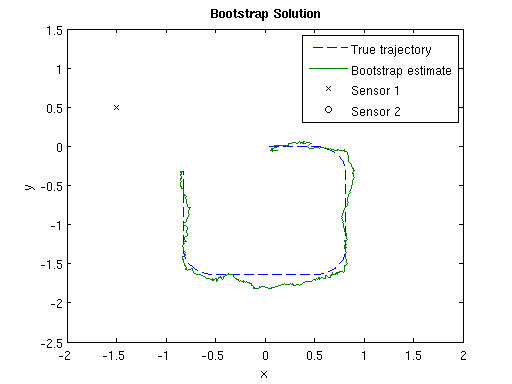

In [8]:
Image(filename='R6_3_Bootstrap.png') 

Method | RMSE
--- | --- 
Baseline Solution | 1.0194
UKF Solution | 0.42017
CKF Solution | 0.42017
Bootstrap Solution | 0.4599